# import libriries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# load data

In [2]:
df = pd.read_csv("wind_dataset.csv")
df

,DATE,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
0,1961-01-01,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0
1,1961-01-02,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1
2,1961-01-03,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5
3,1961-01-04,8.63,0,0.2,0.0,5.6,0.0,0.4,-3.2
4,1961-01-05,11.92,0,10.4,0.0,7.2,1.0,-1.5,-7.5
...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,14.46,0,16.8,0.0,9.8,0.0,4.0,0.0
6570,1978-12-28,14.33,0,16.0,0.0,9.1,0.0,8.5,8.0
6571,1978-12-29,19.17,0,14.7,0.0,5.0,0.0,3.5,3.2
6572,1978-12-30,18.08,0,4.9,0.0,2.9,0.0,0.3,-0.5


In [3]:
df.shape

(6574, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6574 entries, 0 to 6573
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     6574 non-null   object 
 1   WIND     6574 non-null   float64
 2   IND      6574 non-null   int64  
 3   RAIN     6574 non-null   float64
 4   IND.1    6513 non-null   float64
 5   T.MAX    5953 non-null   float64
 6   IND.2    6513 non-null   float64
 7   T.MIN    5900 non-null   float64
 8   T.MIN.G  6214 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 462.4+ KB


In [5]:
df.describe()

,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
count,6574.000000,6574.000000,6574.000000,6513.000000,5953.000000,6513.000000,5900.000000,6214.000000
mean,9.796834,0.391542,1.885169,0.356364,13.339123,0.464456,6.411678,2.736547
std,4.977272,1.179092,4.030529,1.128552,4.890546,1.177571,4.637243,5.569175
min,0.000000,0.000000,0.000000,0.000000,-0.100000,0.000000,-11.500000,-14.400000
25%,6.000000,0.000000,0.000000,0.000000,9.600000,0.000000,3.000000,-1.000000
50%,9.210000,0.000000,0.200000,0.000000,13.300000,0.000000,6.500000,3.000000
75%,12.960000,0.000000,2.000000,0.000000,17.200000,0.000000,10.000000,7.000000
max,30.370000,4.000000,67.000000,4.000000,26.800000,4.000000,18.000000,15.800000


# clean data

In [6]:
df.isnull().sum()

DATE         0
WIND         0
IND          0
RAIN         0
IND.1       61
T.MAX      621
IND.2       61
T.MIN      674
T.MIN.G    360
dtype: int64

In [7]:
df['IND.1'].mean()
df['IND.1'].value_counts()


0.0    5912
4.0     560
2.0      40
1.0       1
Name: IND.1, dtype: int64

In [8]:
colu = ["T.MAX" ,"IND.2" ,"T.MIN" ,"T.MIN.G" ]
for i in colu:
    print(df[i].value_counts())

 10.0    80
 15.5    69
 18.0    68
 11.0    68
 14.0    63
         ..
 1.7      1
-0.1      1
 1.0      1
 25.5     1
 1.6      1
Name: T.MAX, Length: 246, dtype: int64
0.0    5352
4.0     613
1.0     525
2.0      21
3.0       2
Name: IND.2, dtype: int64
 9.0     90
 5.0     88
 6.0     86
 10.0    79
 10.5    78
         ..
-6.2      1
-8.1      1
-7.8      1
-10.7     1
 15.1     1
Name: T.MIN, Length: 247, dtype: int64
 5.0     121
 0.0     100
 4.0      98
 4.5      86
 0.5      84
        ... 
-10.1      1
-11.9      1
-13.0      1
-14.4      1
-10.6      1
Name: T.MIN.G, Length: 283, dtype: int64


In [9]:
Filter1 = df['IND.1'].mean()
df["IND.1"].fillna(Filter1 , inplace = True)

In [10]:
FilterTmax = 10
FilterInd =0
FilterTMIN = 9.0
FilterTMIN_g = 5.0
df["T.MAX"].fillna(FilterTmax , inplace = True)
df["IND.2"].fillna(FilterInd , inplace = True)
df["T.MIN"].fillna(FilterTMIN , inplace = True)
df["T.MIN.G"].fillna(FilterTMIN_g , inplace = True)

In [11]:
df.isnull().sum()

DATE       0
WIND       0
IND        0
RAIN       0
IND.1      0
T.MAX      0
IND.2      0
T.MIN      0
T.MIN.G    0
dtype: int64

In [12]:
df['DATE'] =pd.to_datetime(df['DATE'])
df['DATE'].dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6574 entries, 0 to 6573
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   DATE     6574 non-null   datetime64[ns]
 1   WIND     6574 non-null   float64       
 2   IND      6574 non-null   int64         
 3   RAIN     6574 non-null   float64       
 4   IND.1    6574 non-null   float64       
 5   T.MAX    6574 non-null   float64       
 6   IND.2    6574 non-null   float64       
 7   T.MIN    6574 non-null   float64       
 8   T.MIN.G  6574 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 462.4 KB


In [13]:
df['Year'] = df['DATE'].dt.year
df['Month'] = df['DATE'].dt.month
df['Day'] = df['DATE'].dt.day

In [14]:
df.head(50)

,DATE,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G,Year,Month,Day
0,1961-01-01,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0,1961,1,1
1,1961-01-02,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1,1961,1,2
2,1961-01-03,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5,1961,1,3
3,1961-01-04,8.63,0,0.2,0.0,5.6,0.0,0.4,-3.2,1961,1,4
4,1961-01-05,11.92,0,10.4,0.0,7.2,1.0,-1.5,-7.5,1961,1,5
5,1961-01-06,10.67,0,0.0,0.0,6.5,0.0,1.2,-2.0,1961,1,6
6,1961-01-07,9.17,0,1.9,0.0,9.2,1.0,-2.4,-7.1,1961,1,7
7,1961-01-08,14.29,0,0.0,0.0,6.6,0.0,3.1,0.0,1961,1,8
8,1961-01-09,8.04,0,8.3,0.0,6.8,0.0,2.4,-0.8,1961,1,9
9,1961-01-10,11.42,0,0.0,0.0,6.5,0.0,3.0,0.5,1961,1,10


In [15]:
df['Month'].value_counts()

1     558
3     558
5     558
7     558
8     558
10    558
12    558
4     540
6     540
9     540
11    540
2     508
Name: Month, dtype: int64

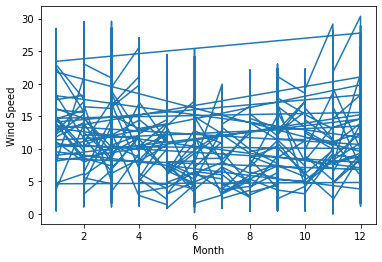

In [16]:
month = df["Month"]
wind  = df['WIND']
plt.xlabel('Month')
plt.ylabel('Wind Speed')
plt.plot(month, wind)
plt.show()

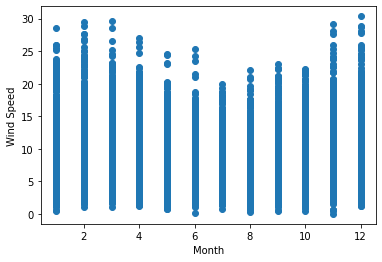

In [17]:
plt.xlabel('Month')
plt.ylabel('Wind Speed')
plt.scatter(month , wind)
plt.show()

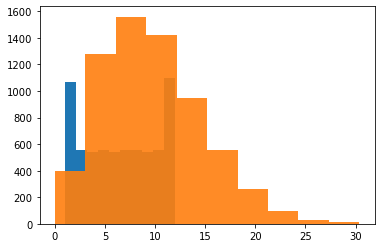

In [18]:
plt.hist(month)
plt.hist(wind,alpha=0.9)
plt.show()

<AxesSubplot:>

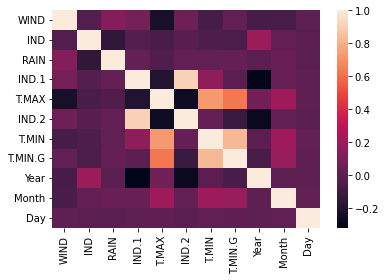

In [19]:
sns.heatmap(df.corr())


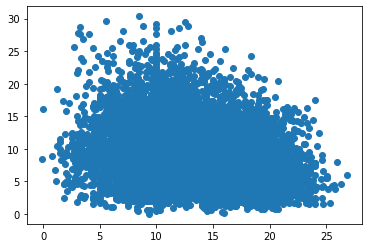

In [20]:
plt.scatter(df['T.MAX'],wind)
plt.show()

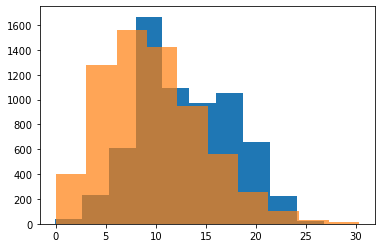

In [21]:
plt.hist(df['T.MAX'])
plt.hist(wind, alpha = 0.7)
plt.show()

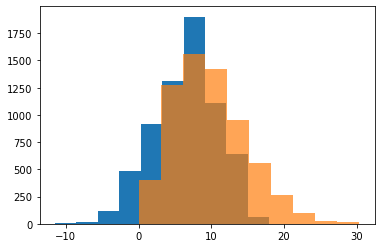

In [22]:
plt.hist(df['T.MIN'])
plt.hist(wind, alpha = 0.7)
plt.show()

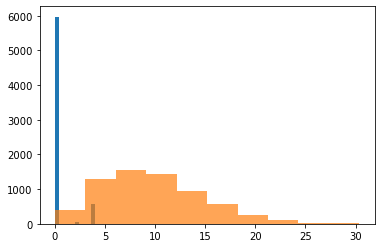

In [23]:
plt.hist(df['IND.1'])
plt.hist(wind, alpha = 0.7)
plt.show()

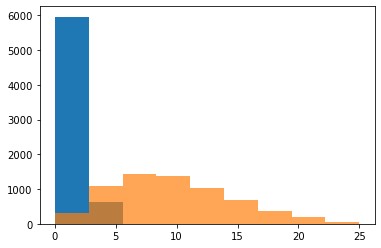

In [24]:
bins = np.linspace(0,25,10)
plt.hist(df['IND.2'] , bins , alpha =1 , label="x")
plt.hist(wind, bins ,alpha = 0.7,label="y")
plt.show()

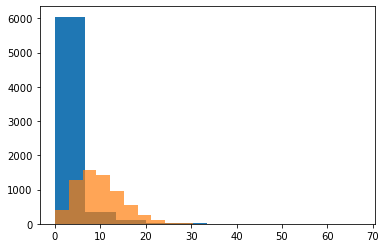

In [25]:
plt.hist(df['RAIN'])
plt.hist(wind, alpha = 0.7)
plt.show()

In [26]:
df

,DATE,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G,Year,Month,Day
0,1961-01-01,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0,1961,1,1
1,1961-01-02,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1,1961,1,2
2,1961-01-03,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5,1961,1,3
3,1961-01-04,8.63,0,0.2,0.0,5.6,0.0,0.4,-3.2,1961,1,4
4,1961-01-05,11.92,0,10.4,0.0,7.2,1.0,-1.5,-7.5,1961,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,14.46,0,16.8,0.0,9.8,0.0,4.0,0.0,1978,12,27
6570,1978-12-28,14.33,0,16.0,0.0,9.1,0.0,8.5,8.0,1978,12,28
6571,1978-12-29,19.17,0,14.7,0.0,5.0,0.0,3.5,3.2,1978,12,29
6572,1978-12-30,18.08,0,4.9,0.0,2.9,0.0,0.3,-0.5,1978,12,30


In [27]:
FilterTMIN1 = df[(df["T.MIN"]>=3.0) & (df["T.MIN"]<=15.0)]
FilterTMIN1['Month'].value_counts()


8     537
6     532
7     527
10    518
9     512
5     504
4     394
1     330
11    329
3     315
12    312
2     280
Name: Month, dtype: int64

In [28]:
FilterTMIN1_2 = df[(df["T.MIN"]>=3.0) & (df["T.MIN"]<=15.0)&(df["WIND"]>10.0)]
FilterTMIN1_2['WIND'].value_counts()
FilterTMIN1_2['Month'].value_counts()



1     219
10    219
12    215
3     208
4     199
5     188
11    188
9     183
2     157
6     152
7     143
8     143
Name: Month, dtype: int64

# Analysis data

In [29]:
FilterTmax1 = df[(df["T.MAX"]>=9.0) & (df["T.MAX"]<=15.0)&(df["WIND"]>10.0)]

FilterTmax1['Month'].value_counts()

# FilterTmax1['WIND'].value_counts()

12    219
3     212
1     202
4     198
11    181
10    150
2     137
5     132
9      65
6      38
8      20
7      13
Name: Month, dtype: int64

In [30]:
FilterNEW1 = df[(df["T.MIN"]>=3.0) & (df["T.MIN"]<=15.0) & (df["T.MAX"]>=9.0) & (df["T.MAX"]<=15.0) &(df["WIND"]>10.0)]
FilterNEW1['Month'].value_counts()
# FilterTmax1['WIND'].value_counts()
# FilterNEW1

4     167
12    165
1     163
3     161
11    149
10    138
5     126
2     108
9      63
6      38
8      20
7      13
Name: Month, dtype: int64

In [31]:
FilterRain1 = df[(df["RAIN"]>=0.0) & (df["RAIN"]<=15.0) &(df["WIND"]>10.0)]
FilterRain1["WIND"].value_counts()
FilterRain1["Month"].value_counts()

1     332
12    327
3     302
2     269
11    264
4     244
10    224
5     192
9     179
6     154
7     146
8     142
Name: Month, dtype: int64

In [32]:
FilterIND1 = df[(df["IND.1"]>=3.0) & (df["IND.1"]<=5.0) &(df["WIND"]>10.0)]
FilterIND1["WIND"].value_counts()
FilterIND1["Month"].value_counts()

1     41
12    38
11    37
10    30
2     28
9     26
3     21
4     18
8     16
6     13
5     11
7      9
Name: Month, dtype: int64

In [33]:
FilterIND2 = df[(df["IND.2"]>=3.0) & (df["IND.2"]<=5.0) &(df["WIND"]>10.0)]
FilterIND2["WIND"].value_counts()
FilterIND2["Month"].value_counts()

1     56
10    40
12    38
11    37
2     28
9     26
3     20
4     18
8     16
6     13
5     11
7      9
Name: Month, dtype: int64

In [34]:
df.drop('Year' , axis =1,inplace = True)
df.drop('Day' , axis =1,inplace = True)

In [35]:
df.drop("DATE", axis= 1 , inplace =True)

In [36]:
df

,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G,Month
0,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0,1
1,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1,1
2,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5,1
3,8.63,0,0.2,0.0,5.6,0.0,0.4,-3.2,1
4,11.92,0,10.4,0.0,7.2,1.0,-1.5,-7.5,1
...,...,...,...,...,...,...,...,...,...
6569,14.46,0,16.8,0.0,9.8,0.0,4.0,0.0,12
6570,14.33,0,16.0,0.0,9.1,0.0,8.5,8.0,12
6571,19.17,0,14.7,0.0,5.0,0.0,3.5,3.2,12
6572,18.08,0,4.9,0.0,2.9,0.0,0.3,-0.5,12


## After analysid data we find that the best months to turn on the Turbine is between 11 to 1 becuse the wind speed in this months is high with specific features 

# prediction model

In [37]:
X = df.drop(["WIND"] ,axis =1 )
y = df["WIND"]

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1 ,shuffle=False)

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
reg = LinearRegression()
reg.fit(X_train, y_train)
predict = reg.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predict))
print('MSE:', metrics.mean_squared_error(y_test, predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predict)))

MAE: 3.602133337132219
MSE: 20.645245725706744
RMSE: 4.543703965456678


In [40]:
x_input =  pd.DataFrame(np.array([[0,14.7,0.0,5.0,0.0,3.5,3.2,12]]))
reg.predict(x_input)

C:\Users\moham\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([14.44905209])